In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io
from decimal import Decimal
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

In [7]:
def displayData(X, example_width=None):
    m,n = X.shape
    plt.figure()
    if X.ndim == 1:
        X = np.reshape(X, (-1,m))
    if not example_width or not 'example_width' in locals():
        example_width = int(round(math.sqrt(X.shape[1])))
    plt.set_cmap("gray")
    example_height = n / example_width
    display_rows = int(math.floor(math.sqrt(m)))
    display_cols = int(math.ceil(m / display_rows))
    pad = 1
    display_array = -np.ones((pad + display_rows * int(example_height + pad),  pad + display_cols * int(example_width + pad)))
    curr_ex = 1
    for j in range(1,display_rows+1):
        for i in range (1,display_cols+1):
            if curr_ex > m:
                break
            max_val = max(abs(X[curr_ex-1, :]))
            rows = pad + (j - 1) * (int(example_height) + pad) + np.array(range(int(example_height)))
            cols = pad + (i - 1) * (int(example_width)  + pad) + np.array(range(int(example_width)))
            display_array[rows[0]:rows[-1]+1 , cols[0]:cols[-1]+1] = np.reshape(X[curr_ex-1, :], (int(example_height), int(example_width)), order="F") / max_val
            curr_ex += 1
            if curr_ex > m:
                break
    h = plt.imshow(display_array, vmin=-1, vmax=1)
    plt.axis('off')
    plt.show(block=False)
    return h, display_array

In [8]:
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units

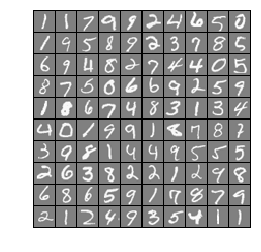

In [9]:
data = scipy.io.loadmat('hand_written_numbers.mat')
X=data["X"]
y=data["y"]
m,n=X.shape
y=y.flatten()
rand_indices = np.random.permutation(m)
random_images = X[rand_indices[:100],:]
displayData(random_images);

In [10]:
#In the loaded data 10 means 0. Here we correct the tag.
y[y==10]=0
num_labels=np.unique(y).shape [0]
print("Number of labels ",num_labels)
print("Shape of X ",X.shape)
print("Shape of y ",y.shape)

Number of labels  10
Shape of X  (5000, 400)
Shape of y  (5000,)


In [11]:
#One hot encoding
y = np_utils.to_categorical(y)
print("Shape of X ",X.shape)
print("Shape of y ",y.shape)

Shape of X  (5000, 400)
Shape of y  (5000, 10)


Building a ANN

In [12]:
ANN_classifier = Sequential()
ANN_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = input_layer_size))
ANN_classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
ANN_classifier.add(Dense(units = num_labels, kernel_initializer = 'uniform', activation = 'softmax'))
ANN_classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Training the neural network

In [13]:
history=ANN_classifier.fit(X, y, batch_size = 10, epochs = 100)

Epoch 1/100
5000/5000 [==============================] - 0s - loss: 1.8847 - acc: 0.2670     
Epoch 2/100
5000/5000 [==============================] - 0s - loss: 1.2099 - acc: 0.5884     
Epoch 3/100
5000/5000 [==============================] - 0s - loss: 0.9961 - acc: 0.6442     
Epoch 4/100
5000/5000 [==============================] - 0s - loss: 0.9330 - acc: 0.6756     
Epoch 5/100
5000/5000 [==============================] - 0s - loss: 0.8966 - acc: 0.6940     
Epoch 6/100
5000/5000 [==============================] - 0s - loss: 0.8677 - acc: 0.7022     
Epoch 7/100
5000/5000 [==============================] - 0s - loss: 0.8443 - acc: 0.7162     
Epoch 8/100
5000/5000 [==============================] - 0s - loss: 0.8200 - acc: 0.7304     
Epoch 9/100
5000/5000 [==============================] - 0s - loss: 0.7983 - acc: 0.7428     
Epoch 10/100
5000/5000 [==============================] - 0s - loss: 0.7738 - acc: 0.7516     
Epoch 11/100
5000/5000 [==============================] - 0

5000/5000 [==============================] - 0s - loss: 0.2051 - acc: 0.9398     
Epoch 85/100
5000/5000 [==============================] - 0s - loss: 0.2023 - acc: 0.9384     
Epoch 86/100
5000/5000 [==============================] - 0s - loss: 0.2024 - acc: 0.9394     
Epoch 87/100
5000/5000 [==============================] - 0s - loss: 0.2016 - acc: 0.9396     
Epoch 88/100
5000/5000 [==============================] - 0s - loss: 0.1984 - acc: 0.9404     
Epoch 89/100
5000/5000 [==============================] - 0s - loss: 0.1961 - acc: 0.9438     
Epoch 90/100
5000/5000 [==============================] - 0s - loss: 0.1963 - acc: 0.9416     
Epoch 91/100
5000/5000 [==============================] - 0s - loss: 0.1952 - acc: 0.9406     
Epoch 92/100
5000/5000 [==============================] - 0s - loss: 0.1957 - acc: 0.9416     
Epoch 93/100
5000/5000 [==============================] - 0s - loss: 0.1904 - acc: 0.9464     
Epoch 94/100
5000/5000 [==============================] - 0s - 

Make predictions using the trained model

Displaying Example Image


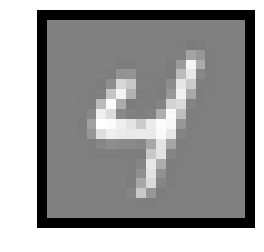

Neural Network Prediction:  4
Program paused. Press enter to continue.

Displaying Example Image


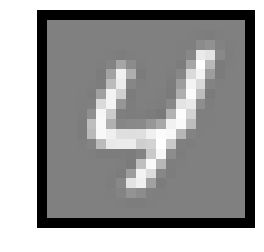

Neural Network Prediction:  4
Program paused. Press enter to continue.

Displaying Example Image


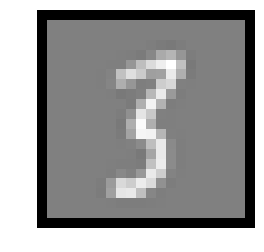

Neural Network Prediction:  3
Program paused. Press enter to continue.

Displaying Example Image


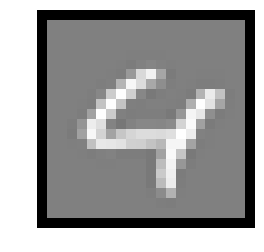

Neural Network Prediction:  4
Program paused. Press enter to continue.

Displaying Example Image


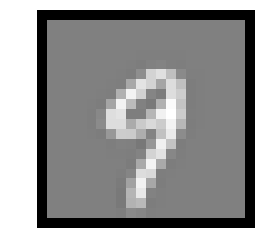

Neural Network Prediction:  9
Program paused. Press enter to continue.

Displaying Example Image


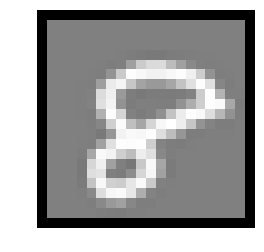

Neural Network Prediction:  8
Program paused. Press enter to continue.

Displaying Example Image


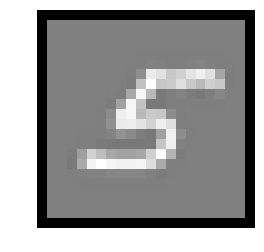

Neural Network Prediction:  5
Program paused. Press enter to continue.

Displaying Example Image


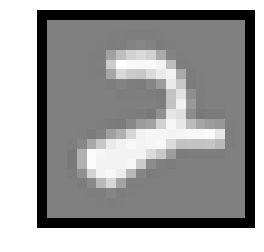

Neural Network Prediction:  2
Program paused. Press enter to continue.

Displaying Example Image


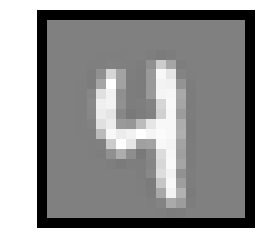

Neural Network Prediction:  4
Program paused. Press enter to continue.

Displaying Example Image


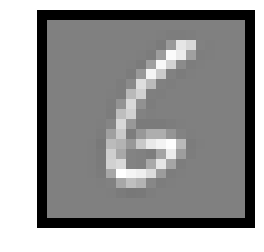

Neural Network Prediction:  6
Program paused. Press enter to continue.



In [14]:
#Create randomized index
rp = np.random.permutation(5000)
#Try out on the data
for i in range(10):
    print('Displaying Example Image')
    displayData(X[rp[i], :].reshape(1,-1))
    pred = ANN_classifier.predict(X[rp[i],:].reshape(1,-1))
    print('Neural Network Prediction: ',np.argmax(pred))
    input('Program paused. Press enter to continue.\n')